# DATA 731 Stochastic Projet 

Correlation study on satellite imagery flattened.    
The objectif on this projet is to discover and have a first approach to the differents tools that are used on computer vision.   

## 0. Init

In [1]:
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import stats

## 1. Data input

In [2]:
dataImages_landCover = []
imagesDate_landCover = [] 

dataImages_confidenceLevel = []
imagesDate_confidenceLevel = []

In [3]:
entries_landCover = os.listdir('FireCCI_LandCover_GEE/')
entries_confidenceLevel = os.listdir('FireCCI_ConfidenceLevel_GEE/')

for file_path in entries_landCover : 
    with rasterio.open(f"FireCCI_LandCover_GEE/{file_path}") as src:
        data = src.read(1)
        dateTmp = file_path.split(".")[1].split("_")
        date = f"{dateTmp[0]}/{dateTmp[1]}/{dateTmp[2]}"
        dataImages_landCover.append(data)
        imagesDate_landCover.append(date)

for file_path in entries_confidenceLevel : 
    with rasterio.open(f"FireCCI_ConfidenceLevel_GEE/{file_path}") as src:
        data = src.read(1)
        dateTmp = file_path.split(".")[1].split("_")
        date = f"{dateTmp[0]}/{dateTmp[1]}/{dateTmp[2]}"
        dataImages_confidenceLevel.append(data)
        imagesDate_confidenceLevel.append(date)

In [4]:
date_landCover = pd.to_datetime(imagesDate_landCover)
date_confidenceLevel = pd.to_datetime(imagesDate_confidenceLevel)

# Create DataFrames with formatted date columns
image_df_1 = pd.DataFrame({'date': date_landCover, 'data_landCover': dataImages_landCover})
image_df_2 = pd.DataFrame({'date': date_confidenceLevel, 'data_confidenceLevel': dataImages_confidenceLevel})

image_df = image_df_1.merge(image_df_2, on='date', how='left')
image_df

,date,data_landCover,data_confidenceLevel
0,2015-01-01,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
1,2015-02-01,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
2,2015-03-01,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
3,2015-04-01,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
4,2015-05-01,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
...,...,...,...
67,2020-08-01,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
68,2020-09-01,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
69,2020-10-01,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 99, 98, 99, 100, 100, 99, 26, 71, 9..."
70,2020-11-01,"[[0, 0, 0, 0, 0, 0, 50, 50, 180, 0, 0, 0, 180,...","[[0, 0, 0, 96, 98, 99, 100, 100, 99, 26, 71, 9..."


## 2. Grouping the Flattened Data
This approach allows me to analyze the correlation between different groups of ground types and their associated fire probabilities. By categorizing the data in this manner, I can more effectively discern patterns and relationships within the varied terrain types and their susceptibility to fires.

In [5]:
image_df['data_landCover'] = image_df['data_landCover'].apply(lambda x: x.flatten() if isinstance(x, np.ndarray) else x)
image_df['data_confidenceLevel'] = image_df['data_confidenceLevel'].apply(lambda x: x.flatten() if isinstance(x, np.ndarray) else x)

In this case I am grouping the data in groups of 50 pixels.

In [6]:
def divide_into_groups(array):
    array_length = len(array)

    #Number of values in each group.
    group_size = 50
    
    groups = [array[i:i + group_size] for i in range(0, array_length, group_size)]
    return groups

In [7]:
image_df['groups_landCover'] = image_df['data_landCover'].apply(lambda x: divide_into_groups(x))
image_df['groups_confidenceLevel'] = image_df['data_confidenceLevel'].apply(lambda x: divide_into_groups(x))
image_df

,date,data_landCover,data_confidenceLevel,groups_landCover,groups_confidenceLevel
0,2015-01-01,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
1,2015-02-01,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
2,2015-03-01,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
3,2015-04-01,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
4,2015-05-01,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
...,...,...,...,...,...
67,2020-08-01,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
68,2020-09-01,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
69,2020-10-01,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 99, 98, 99, 100, 100, 99, 26, 71, 98...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 99, 98, 99, 100, 100, 99, 26, 71, 9..."
70,2020-11-01,"[0, 0, 0, 0, 0, 0, 50, 50, 180, 0, 0, 0, 180, ...","[0, 0, 0, 96, 98, 99, 100, 100, 99, 26, 71, 98...","[[0, 0, 0, 0, 0, 0, 50, 50, 180, 0, 0, 0, 180,...","[[0, 0, 0, 96, 98, 99, 100, 100, 99, 26, 71, 9..."


## 3. Group correlation study on flatten data on images
Using the Spearman's rank correlation coefficient:      
    
$$\rho = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}$$     
with 
$${\displaystyle d_{i}={R} (X_{i})-{R} (Y_{i})}$$
  
The Spearman correlation is a non-parametric test, meaning it does not assume that the data follows a normal distribution (Gaussian distribution). Environmental data normally follows complex and varied  distributions patterns.    
Spearman correlation works by comparing the ranks of data rather than their actual values. This is particularly useful in ecological studies where the exact numerical values might not be as important as the relative ordering.     
Spearman correlation is less sensitive to outliers than other correlation methods
 




In [8]:
def spearman_function(x, y):
    n = len(x)
    
    rank_x = [sorted(x).index(i) + 1 for i in x]
    rank_y = [sorted(y).index(j) + 1 for j in y]

    d = [rx - ry for rx, ry in zip(rank_x, rank_y)]

    d_squared = sum(d_i ** 2 for d_i in d)

    rho = 1 - (6 * d_squared) / (n * (n**2 - 1))

    return rho

def calculate_correlations_spearman(groups1, groups2):
    correlations = []
    for g1, g2 in zip(groups1, groups2):
        correlation = spearman_function(g1, g2)
        correlations.append((correlation))
    correlations = np.array(correlations)
    return correlations

In [9]:
image_df['slice_correlations_spearman'] = image_df.apply(lambda row: calculate_correlations_spearman(row['groups_landCover'], row['groups_confidenceLevel']), axis=1)
image_df

,date,data_landCover,data_confidenceLevel,groups_landCover,groups_confidenceLevel,slice_correlations_spearman
0,2015-01-01,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[0.8988235294117647, 0.99078031212485, 1.0, 0...."
1,2015-02-01,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[0.8988235294117647, 0.99078031212485, 1.0, 0...."
2,2015-03-01,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[0.8988235294117647, 0.99078031212485, 1.0, 0...."
3,2015-04-01,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[0.8988235294117647, 0.99078031212485, 1.0, 0...."
4,2015-05-01,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[0.8988235294117647, 0.99078031212485, 1.0, 0...."
...,...,...,...,...,...,...
67,2020-08-01,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[0.8709243697478992, 0.99078031212485, 1.0, 0...."
68,2020-09-01,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[0.8709243697478992, 0.99078031212485, -0.4554..."
69,2020-10-01,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 99, 98, 99, 100, 100, 99, 26, 71, 98...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 99, 98, 99, 100, 100, 99, 26, 71, 9...","[-0.5871788715486195, 0.5128931572629052, 0.75..."
70,2020-11-01,"[0, 0, 0, 0, 0, 0, 50, 50, 180, 0, 0, 0, 180, ...","[0, 0, 0, 96, 98, 99, 100, 100, 99, 26, 71, 98...","[[0, 0, 0, 0, 0, 0, 50, 50, 180, 0, 0, 0, 180,...","[[0, 0, 0, 96, 98, 99, 100, 100, 99, 26, 71, 9...","[0.6295798319327731, 0.5248499399759904, -0.49..."


## 4. Group correlation study on flatten data on images
Using scipy.stats.spearmanr.
This function not only calculates the Spearman correlation coefficient but also provides the corresponding p-value for each measure.     
To maintain simplicity in the study, I will focus primarily on the correlation coefficients and will leave the significance testing for another study.

In [10]:
def calculate_correlations_statsSpearman(groups1, groups2):
    correlations = []
    for g1, g2 in zip(groups1, groups2):
        correlation, _ = stats.spearmanr(g1, g2)
        correlations.append((correlation))
    correlations = np.array(correlations)
    return correlations

In [11]:
image_df['slice_correlations_statSpearman'] = image_df.apply(lambda row: calculate_correlations_statsSpearman(row['groups_landCover'], row['groups_confidenceLevel']), axis=1)
image_df

C:\Users\Carlos Andres Cortes\AppData\Local\Temp\ipykernel_9612\780429059.py:4: DeprecationWarning: Please use `spearmanr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  correlation, _ = stats.spearmanr(g1, g2)
c:\Users\Carlos Andres Cortes\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


,date,data_landCover,data_confidenceLevel,groups_landCover,groups_confidenceLevel,slice_correlations_spearman,slice_correlations_statSpearman
0,2015-01-01,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[0.8988235294117647, 0.99078031212485, 1.0, 0....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
1,2015-02-01,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[0.8988235294117647, 0.99078031212485, 1.0, 0....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
2,2015-03-01,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[0.8988235294117647, 0.99078031212485, 1.0, 0....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
3,2015-04-01,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[0.8988235294117647, 0.99078031212485, 1.0, 0....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
4,2015-05-01,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[0.8988235294117647, 0.99078031212485, 1.0, 0....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
...,...,...,...,...,...,...,...
67,2020-08-01,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[0.8709243697478992, 0.99078031212485, 1.0, 0....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
68,2020-09-01,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[0.8709243697478992, 0.99078031212485, -0.4554...","[nan, nan, nan, 0.4152890493784791, nan, nan, ..."
69,2020-10-01,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 99, 98, 99, 100, 100, 99, 26, 71, 98...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 99, 98, 99, 100, 100, 99, 26, 71, 9...","[-0.5871788715486195, 0.5128931572629052, 0.75...","[nan, 0.6012048895448149, 0.6307373736326017, ..."
70,2020-11-01,"[0, 0, 0, 0, 0, 0, 50, 50, 180, 0, 0, 0, 180, ...","[0, 0, 0, 96, 98, 99, 100, 100, 99, 26, 71, 98...","[[0, 0, 0, 0, 0, 0, 50, 50, 180, 0, 0, 0, 180,...","[[0, 0, 0, 96, 98, 99, 100, 100, 99, 26, 71, 9...","[0.6295798319327731, 0.5248499399759904, -0.49...","[0.7285600091719964, 0.7652979945239088, nan, ..."


## 5. Results analysis
For the visualization of the two measurements, I calculated the median of each group. This allows for plotting the mean confidence level on one axis against the mean land cover on the other.

It's important to note that the Spearman correlation coefficient, which I used for analysis, ranges from -1 to 1. A coefficient of 1 indicates a perfect positive correlation, meaning that as one variable increases, the other also increases. Conversely, a coefficient of -1 signifies a perfect negative correlation, where an increase in one variable corresponds to a decrease in the other.

In [12]:
groups_landCover = []
groups_confidenceLevel = []
slice_correlations_spearman = []
for i in range(72):
    groups_landCover =groups_landCover + image_df.groups_landCover.tolist()[i]
    groups_confidenceLevel =groups_confidenceLevel + image_df.groups_confidenceLevel.tolist()[i]
    slice_correlations_spearman =slice_correlations_spearman + image_df.slice_correlations_spearman.tolist()[i].tolist()

mean_landCover = [np.nanmean(group)for group in groups_landCover]
mean_confidenceLevel = [np.nanmean(group) for group in groups_confidenceLevel]

In [13]:
slice_correlations_statSpearman = []
for i in range(72):
    slice_correlations_statSpearman =slice_correlations_statSpearman + image_df.slice_correlations_statSpearman.tolist()[i].tolist()

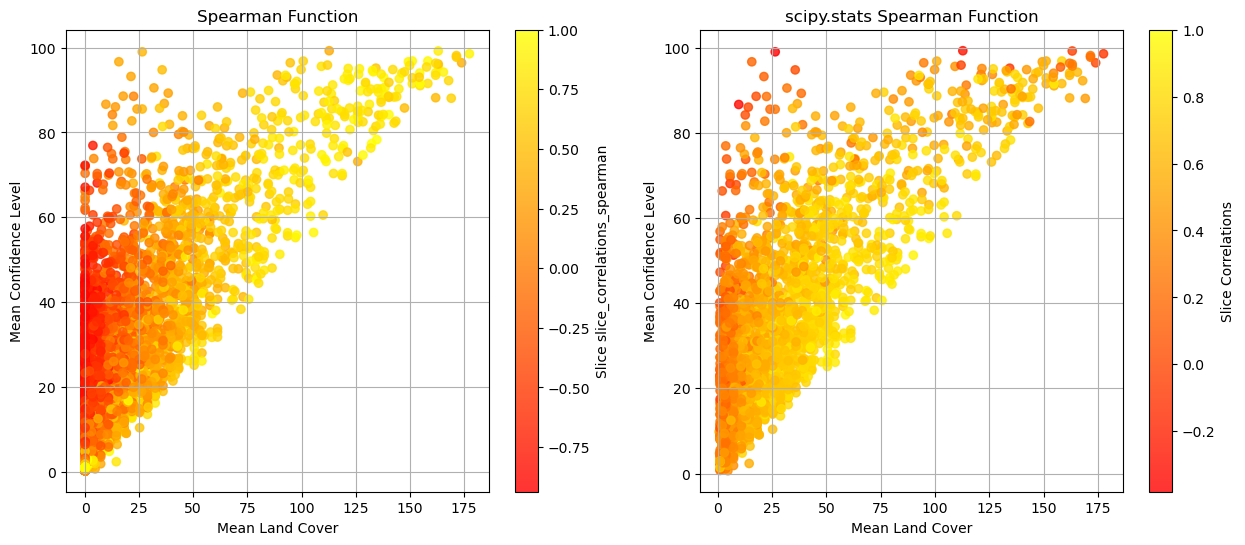

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot for the values founded with the spearman function coded by myself.
scatter_spearman = ax1.scatter(mean_landCover, mean_confidenceLevel, c=slice_correlations_spearman, cmap='autumn', alpha=0.8)
fig.colorbar(scatter_spearman, ax=ax1, label='Slice slice_correlations_spearman')
ax1.set_title('Spearman Function')
ax1.set_xlabel('Mean Land Cover')
ax1.set_ylabel('Mean Confidence Level')
ax1.grid(True)

# Scatter plot for the values founded with the scipy.stats function.
scatter_statSpearman = ax2.scatter(mean_landCover, mean_confidenceLevel, c=slice_correlations_statSpearman, cmap='autumn', alpha=0.8)
fig.colorbar(scatter_statSpearman, ax=ax2, label='Slice Correlations')
ax2.set_title('scipy.stats Spearman Function')
ax2.set_xlabel('Mean Land Cover')
ax2.set_ylabel('Mean Confidence Level')
ax2.grid(True)

plt.show()


We observe a similar distribution pattern in both sets of results, yet there's a notable difference in the correlation values obtained. With the custom-coded function, the correlation dips as low as -0.8 in certain instances, whereas with the scipy.stats function, the correlation does not go beyond -0.2.     

In both analyses, the highest correlation is consistently found in the mean land cover range of 70 to 100. According to the Land Cover Classification Table, this range predominantly represents areas with tree cover, characterized by relatively low humidity. This suggests a higher propensity for fire in these regions. On the other hand, the lowest correlation is observed around values of 0. The 0 value corresponds to croplands/rainfed areas or large water bodies (such as lakes and rivers). Logically, these areas are less prone to wildfires.    

Around +150 there is a difference between the two methodes. The custom-coded function find positive correlation but the function finds some negative correlations.